# Final Project: Predicting Football Tables Throughout the Season
##### Author: Derek Watson
##### Course: CSPB 3022: Intro to Data Science
##### YouTube Video Presentation Link: https://www.youtube.com/watch?v=brlFcGvWbC4

## 1. Topic Introduction

### 1a. Why Soccer?

For many years now I have been a fan of soccer, European club soccer and the international game in particular. I follow some other sports, but the so-called *Beautiful Game* garners the lionshare of my attention. Its fluidity, internationality and the high stakes are what draw me to it. Like any other sport in the modern era, soccer generates a massive amount of data. While there is plenty of on-the-pitch data that one could look at, I have chosen to analyze data about the "table" or the standings of a league at a given point in time. 

Soccer determines a league champion differently than most American sports. Rather than a playoff tournament, the champion is determined entirely by regular season performance. The team with the most "points" based on wins, draws and losses at the end of the season will be crowned the league winner. If there are 20 teams in a league for example, each team will play all of the others twice for a total of 38 matches. Winning a match nets three points, drawing nets one and zero points are awarded for a loss. If two teams are tied in points, table position is determined by a statistic called goal differential (GD), which is simply *goals scored - goals against*. In soccer there also exists the concept of relegation, where the bottom two or three teams at the end of the season will be relegated from the league, or dropped down to play at a lower level and replaced with the best teams from that level in the previous season. 

### 1b. What are you analyzing?

I would like to see based on past data how well goal differential and points at earlier stages of the season can predict what position a team will finish in at the end of the season. So, if a team on matchday ten has 15 points and a -2 goal differential, how accurately can I predict their final position? How much will the accuracy of this prediction improve as the season goes on? After the first matchday position and GD are probably not at all predictive, while on matchday 35 when the season is almost finished position is largely set. At what point in the season can current position predict final position within one palce? Within two places?

In addition to doing a regression from table data, later in the project I decided to include a little more data that gives some non-identifying information about the long-term strength of the club being predicted. I will also now be including stadium capacity and number of seasons in the top league in the dataset. A large stadium capacity will indicate a wealthy club, as will a long streak of playing in a nation's top league. These will likely have predictive value beyond the table stats that are already correlated. 

This is a **regression task**, because I am trying to predict a variable (end of season position) based upon a number of features including current position, points, goal differential, wins, draws, losses and position last season. While end of season position is not a continuous variable, in the project guide it is stated that an **ordinal** discrete variables can also be the target of a regression task.

## 2. Qualification for Bonus

I am defining my own project problem in a space that interests me. I have not found information about how table position converges over the course of a season, so I will be answering a question that is not easy to answer with a quick google search. I could not find readily available data to solve the problem, so I created my own large dataset by writing two webscrapers (see section 3 for more information) and then several programs to parse and combine them into a CSV file format. This took additional time and effort beyond simply downloading an existing CSV or other data file. While the problem itself is simple, it is novel and the results could be surprising.

**Project Repo Found Here: https://github.com/derek-watson14/3022-Project-dewa5122**

The repo contains the webscrapers written for the project as well as notebooks for each part.

## 3. Data Introduction


### 3a. Data Source and Citation

I was unable to find a readily available dataset that included weekly tables and not just end-of-season tables. I was able to find that information on a German soccer statistics website called *Transfermarkt.com*, but it was displayed in HTML tables such as the one below. That website also contained information about stadium capacity on a year-by-year basis so I was able to use it for that information as well, that data was also contained in HTML tables that look similar to the one pictured below.

#### Source Citation
```
Transfermarkt GmbH &amp; Co. KG. (n.d.). League - Table &amp; Results. Transfermarkt. Retrieved November 1, 2022, from https://www.transfermarkt.com/laliga/spieltagtabelle/wettbewerb/{league_code}?saison_id={year}&amp;spieltag={matchday}
```

<img src="./images/sample-table.png" height="600"/>

### 3b. Creating the Dataset

#### Creating Webscrapers

Luckily, the tables were located at easy to parse URLs such as:
```
https://www.transfermarkt.com/laliga/spieltagtabelle/wettbewerb/GB1?saison_id=2017&spieltag=22
```
And the stadium data was also located at parseable URLs like:
```
https://www.transfermarkt.com/laliga/besucherzahlen/wettbewerb/GB1/saison_id/2017/plus/1
```

The league, season and matchday are all included as URL parameters. I could use a web scraping library like `Scrapy` to download the several thousand pages and another library like `BeautifulSoup` to parse the HTML and transform the data into a CSV row for each row of each table. Even the result of the season regarding relagation and Champions league qualification was codified by hex color code and could be translated to more data\*, which I called a team's "Fate".

Leagues will occasionally change the number of teams in the league, the last time such a change was made across Europe's "Big Five" leagues (the top level leagues of Spain, England, Germany, Italy, France) was in 2004. To keep league size consistent across years, I chose 2004 as my first year of analysis. So I downloaded 18 years of data total - both weekly table data and stadium/attendence data.

#### Turning Webpages to CSVs

After the pages had been downloaded, I used `BeautifulSoup` to parse the HTML tables to two CSV files: `table_data.csv` and `stadium_data.csv` these CSV files contained the raw data from the HTML tables in CSV format, with some additional information from the URL parameters. To combine the two CSV files I had parsed I wrote the script `finalize_dataset.py` which combined the data I wanted from the two files and added some extra columns that I thought might be useful into a file called `combined_data.csv`.

A few columns were added that weren't there in the original HTML tables, first a boolean column was added to indicate if a row belongs to a "Final Table" (a table from the end of the season). Another column was added to indicate where the team from that row ended that season, called "EOS Position" (EOS meaning end of season). A third column was added called "Stadium Capacity" that records the capacity of that team's stadium that year. And finally a fourth row was added called "Appearances" which indicates how many times a team played in this top league over this 18 year period. 

### 3c. Dataset Overview

In this section I will look at the general size of the data and print the schema which lists the data type and a description of each feature of the dataset.

In [1]:
from imports import *

df = pd.read_csv('./data-retrieval/data/combined_data.csv')
schema_df = pd.read_csv('./data-retrieval/data/data_schema.csv', index_col='Feature')

#### Size

The original parsed and combined dataset contained 19 columns and 65736 rows

In [2]:
rows, columns = df.shape

print(f"Shape: {rows} rows, {columns} columns")

Shape: 65736 rows, 19 columns


#### Features

There are 10 categorical features and 9 numeric features in the dataset. Many of the categorical features, such as matchday or year or position are expressed as numbers, but are actually categorical. This should be clear with the table below generated from a schema I wrote.

In [3]:
schema_df['Feature Type'].value_counts()

Numerical      10
Categorical     9
Name: Feature Type, dtype: int64

In [4]:
schema_df

,Feature Description,Data Type,Feature Type
Feature,,,
Country,Country in which matches are played,String,Categorical
League,League in which matches are played,String,Categorical
Year,Starting year of season,Integer,Categorical
Club,Soccer club (team) for this row,String,Categorical
Matchday,Week of season for this row,Integer,Categorical
Position,Club's table position on this matchday,Integer,Categorical
Fate,Result of season in terms of international qua...,String,Categorical
Matches,Number of matches played by this matchday,Integer,Numerical
Wins,Matches won up to this matchday,Integer,Numerical


In [5]:
# Sample row from the dataset
df.head(1)

,Country,League,Year,Club,Matchday,Position,Fate,Matches,Wins,Draws,Losses,Goals For,Goals Against,Goal Differential,Points,Final Table,EOS Position,Stadium Capacity,Appearances
0,Spain,La Liga,2004,Real Zaragoza,1,1,League Winner,1,1,0,0,3,1,2,3,False,12,33608,8


## 4. Data Cleaning

### 4a. Verifying dataset accuracy with summary stats

To quickly verify that this dataset is at least somewhat accurate, I can check that a number of summary statistics look how I would expect them to:

- The sum of the Wins column should be equal to the sum of the Losses column
- The sum of Wins, Losses and Draws should equal the sum of the matches
- The sum of the Goal Differential column should be equal to zero
- The count of teams at each position at the end of a season should be uniformly distributed
- **The total points at the end of the season should follow the equation: points = wins*3 + draws*1**

The first four points were satisfied as shown below, the last point was not and had to be handled by removing some rows from the dataset.

In [6]:
wins, losses, draws, matches = df['Wins'].sum(), df['Losses'].sum(), df['Draws'].sum(), df['Matches'].sum()
print(f"Total wins: {wins} | Total losses: {losses} | Equal? {'Yes' if wins == losses else 'No'}\n")
print(f"Wins + Losses + Draws: {wins+losses+draws} | Matches: {matches} | Equal? {'Yes' if wins+losses+draws == matches else 'No'}\n")
print(f"Goal differential sum: {df['Goal Differential'].sum()}\n")
print("Total number teams in each position at end of each season (for four 20-team leagues):")
print(df[(df['Country'].isin(["England", "France", "Italy", "Spain"])) & (df['Matchday'] == 38)]['Position'].value_counts().sort_index())

Total wins: 463998 | Total losses: 463998 | Equal? Yes

Wins + Losses + Draws: 1258700 | Matches: 1258700 | Equal? Yes

Goal differential sum: 0

Total number teams in each position at end of each season (for four 20-team leagues):
1     72
2     72
3     72
4     72
5     72
6     72
7     72
8     72
9     72
10    72
11    72
12    72
13    72
14    72
15    72
16    72
17    72
18    72
19    72
20    72
Name: Position, dtype: int64


### 4b. Removing unusual/erroneuos rows

From the data printed above it's clear that most of those mathematical checks come back good, but one does not:
- **The total points at the end of the season should follow the equation: points = wins*3 + draws*1**

In [7]:
eos_tables = df[df["Final Table"] == True]

more_pts = eos_tables[(eos_tables['Points'] > ((eos_tables['Wins'] * 3) + (eos_tables['Draws'] * 1)))]
less_pts = eos_tables[(eos_tables['Points'] < ((eos_tables['Wins'] * 3) + (eos_tables['Draws'] * 1)))]

print("Clubs with MORE points than expected at EOS: %i" % len(more_pts))
print("Clubs with LESS points than expected at EOS: %i" % len(less_pts))

Clubs with MORE points than expected at EOS: 2
Clubs with LESS points than expected at EOS: 24


So, there are 2 clubs with more points than they should have at the end of the season, and 24 clubs with less points than they should have at the end of the season. 

I looked into some individual cases by comparing the Transfermarkt data to the Wikipedia data for that league in that season and found that reduced points were often connected to scandals, fan misconduct or club misconduct in which teams were penalized points causing thier final table position to not perfectly reflect thier performances.

One example is Juventus in 2005, who won the league but were relegated and awarded 0 points after a cheating scandal was exposed:

In [8]:
juve05 = eos_tables[(eos_tables["Club"] == "Juventus FC") & (eos_tables["Year"] == 2005)]
juve05[["Country", "League", "Year", "Club", "Matchday", "Wins", "Draws", "Losses", "Points", "EOS Position"]]

,Country,League,Year,Club,Matchday,Wins,Draws,Losses,Points,EOS Position
42439,Italy,Serie A,2005,Juventus FC,38,27,10,1,0,20


While one solution here would be to recalculate where Juventus would finish based on their *actual* calcuated points total compared to other Italian clubs in 2005, doing so for every instance of the dataframe would be assuming that all 26 cases of incorrect points totals would be making the assumption that all instances of incorrect point total are real-world, intentional corrections unrelated to on field play. Without looking at all 26 cases individually, I can't confirm that that assumption is true, and I simply don't have the time to read the Wikipedia article for each instance. In addition to this if points were 

Luckily the 26 incorrect values represent <1.5% of the total dataset, so I can simply remove them and have a clean dataset that is effectively the same size. Doing so invalidates some of the verifications done in *4a*, but that will not effect my project as long as the verifications were originally true, thus removing those rows is the best decision for my project. The sample size of the dataset will still be large enough to use.

In [9]:
print(f"Percentage of rows with incorrect point totals: {((len(more_pts) + len(less_pts)) / len(eos_tables) * 100)}%")

Percentage of rows with incorrect point totals: 1.473922902494331%


In [10]:
# Clean dataframe
cldf = df[(df['Points'] == ((df['Wins'] * 3) + (df['Draws'] * 1)))]

# Remaining rows
len(cldf)

64748

In addition to removing those rows, I think the `Fate` column is irrelevant to the project and can be removed because I am not doing a classification project but a regression project with ordinal discrete variables. Also, now that `Matches` has been confirmed to be accurate, it is redundant with `Matchday` and can also be removed. 

In [11]:
cldf = cldf.drop(['Fate','Matches'], axis=1)
cldf.head(2)

,Country,League,Year,Club,Matchday,Position,Wins,Draws,Losses,Goals For,Goals Against,Goal Differential,Points,Final Table,EOS Position,Stadium Capacity,Appearances
0,Spain,La Liga,2004,Real Zaragoza,1,1,1,0,0,3,1,2,3,False,12,33608,8
1,Spain,La Liga,2004,Atlético de Madrid,1,2,1,0,0,2,0,2,3,False,11,68456,18


### 4c. Removing Germany/Bundesliga Entirely

One more step I took since doing part 2 of the project is removing the Bundesliga/Germany entirely from the dataset. This seems somewhat drastic, but including Germany causes problems with the regression/conclusions. Because part of my project is seeing how the predictive power of my model strengthens over the course of the season, including a league with a different season length causes problems.

Germany has an 34 match season, while England, France, Italy and Spain all have 38 match seasons. If I want to see predictive power by matchday, Germany will throw it off by having a different number of matchways. I considered that I could normalize the data by adding a feature quantifying "% of way through season" but that would not produce very useful real-world information at the end of the project.

Again my dataset is large enough to sacrifice some data, so I chose to remove the Bundesliga from the analysis. Even after doing this and the above cleaning, I was still left with over 80% of the original dataset.

In [12]:
cldf = cldf[cldf['Country'] != "Germany"]
cldf.shape

(53732, 17)

In [13]:
print(f"Percent of dataset remaining: {cldf.shape[0]/rows}")

Percent of dataset remaining: 0.8173907752221006


## 5. Exploratory Data Analysis

I decided to look at exploratory data analysis in two phases in my project. First looking at the structure of data from end of season tables through histograms and correlation, and second looking at how earlier season features correlate with end of season position. For example, how much does current position correlate with end of season position for each matchday. There are a number of visualizations below exploring these topics. 

### 5a. Looking at end of season statistics

As one would expect, at the end of the season points, wins, goals for and goal differential correlate negatively\* with position while losses and goals against correlate positively.

\* *Note: A negative correlation with position is, somewhat counterintuitively, a good thing. This is because a low number is desirable for position, so for example when wins goes UP, position is expected to go DOWN. For this reason I created an additional column that reverses position order so that the best team is 20 and the worst team is 1. This makes the correlation matrix much easier to read.*

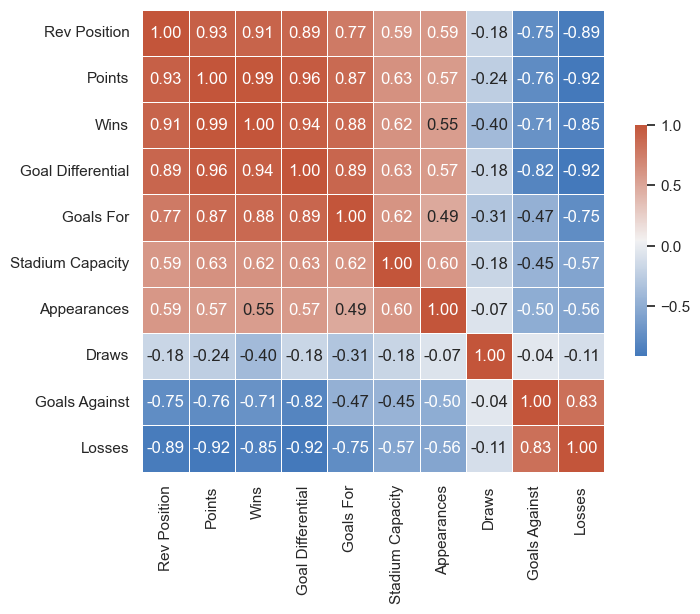

In [14]:
def show_corr_matrix(df, cols):
    # Create list of columns for correlation
    
    # Create matrix with specified columns
    cor_matrix = df[cols]
    corr = cor_matrix.corr()
    
    # Generate diverging color map
    cmap = sns.diverging_palette(250, 20, as_cmap=True)

    f, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

    # Take only numerical categories
    cl_eos_corr_matrix = cl_eos_tables[
        ['Rev Position', 'Points', 'Wins', 'Goal Differential', 'Goals For', 
         'Stadium Capacity', 'Appearances', 'Draws', 'Goals Against', 'Losses', ]
    ]

# Take only final table data
cl_eos_tables = cldf.copy()[cldf['Final Table'] == True]
# Add resverse 
cl_eos_tables["Rev Position"] = np.abs(cl_eos_tables["Position"] - 21)

eos_cols = ['Rev Position', 'Points', 'Wins', 'Goal Differential', 'Goals For', 
            'Stadium Capacity', 'Appearances', 'Draws', 'Goals Against', 'Losses', ]

show_corr_matrix(cl_eos_tables, eos_cols)

That information was mostly obvious, but it's good to see visually. We can see that some statistics, like goals for and against don't correlate as perfectly with position as one might hope to make predictions. Some teams can of course concede many goals but still do well on the season because of a strong offense or have the inverse be true.

As you can see below, teams have finished in first with anywhere from around 50 to 120 goals, but a correlation can still be observed. There is almost overlap between the highest-scoring last place finisher and the lowest scoring first-place finisher.

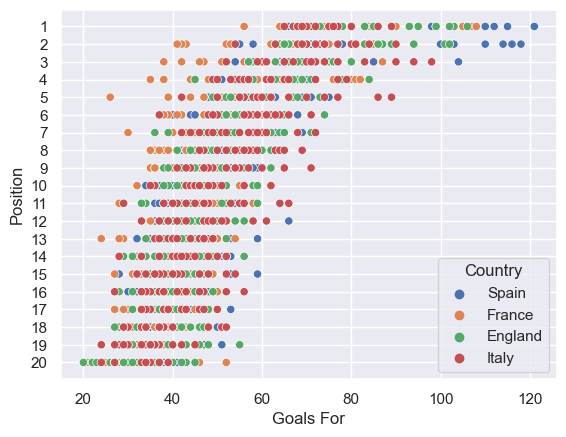

In [15]:
cl_eos_position = cl_eos_tables["Position"]

cl_eos_gf = cl_eos_tables["Goals For"]

gfp = sns.scatterplot(x=cl_eos_gf, y=cl_eos_position, hue=cl_eos_tables["Country"])
plt.yticks(np.linspace(1,20,20))
gfp.invert_yaxis()

As one can see below, goal differential is approximately normally distributed at the end of the season around 0.

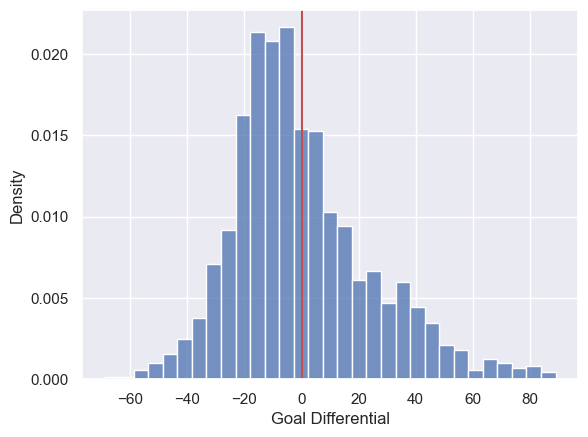

In [16]:
cl_eos_gd = cl_eos_tables["Goal Differential"]

sns.histplot(cl_eos_gd, stat='density');
plt.axvline(cl_eos_gd.mean(), c='r');

It is also good to take a quick look at our non-table statistics: `Appearances` and `Stadium Capacity`.

Removing duplicates (i.e. teams with 18 appearances being included 18 times), you can see that there are almost as many teams with one appearance in the league as teams who appeared every year. I predict that these smaller teams probably finish below where their table statistics alone would put them.

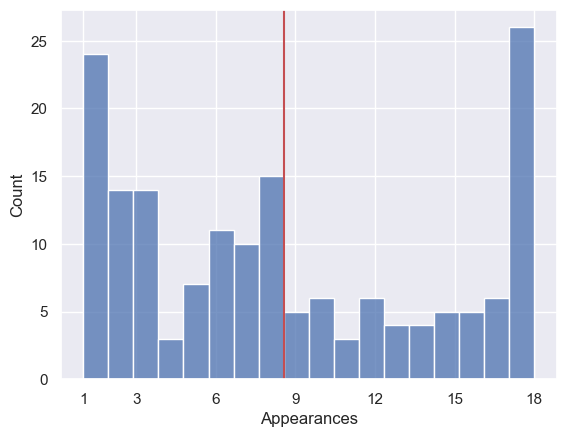

In [17]:
cl_eos_app = cl_eos_tables[["Club","Appearances"]].drop_duplicates()["Appearances"]

sns.histplot(cl_eos_app, bins=18);
plt.axvline(cl_eos_app.mean(), c='r');
plt.xticks([1, 3, 6, 9, 12, 15, 18]);

Looking at stadium capacity, we can see that stadiums have a mean capacity of around 30,000 with a right skew. I would guess that even if they are performing poorly early in the season, teams with large stadium capacities will outperform what would be predicted purely by table statistics becuase they have such greater resources.

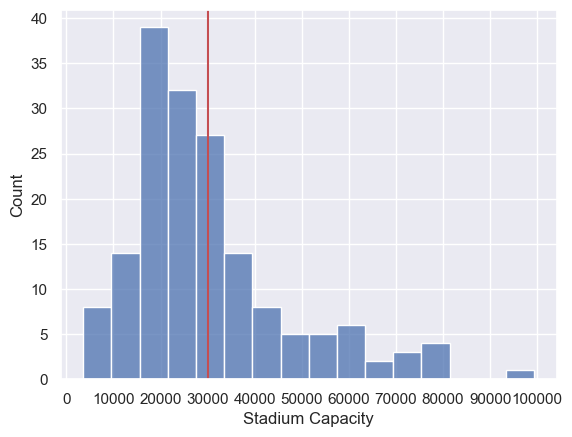

In [18]:
cl_eos_stadiums = cl_eos_tables[["Club","Stadium Capacity"]].drop_duplicates()["Stadium Capacity"]

sns.histplot(cl_eos_stadiums);
plt.axvline(cl_eos_stadiums.mean(), c='r');
plt.xticks(np.linspace(0, 100000, 11));

### 5b. Looking at how well early season can predict late season

All of the above is fairly obvious, but the end goal of the project is to see how well only common table statistics can be used to predict end of season position. One way to do this is to group all teams by table position then by matchday and display the average distance a team is at that point in the season from thier final position as an absolute value.

For example, for all third place teams on matchday five the average end of season position is actually +-2.76 positions. As the season goes on, the current position reflects more closely the end of season position. On the final matchday this difference should be 0.

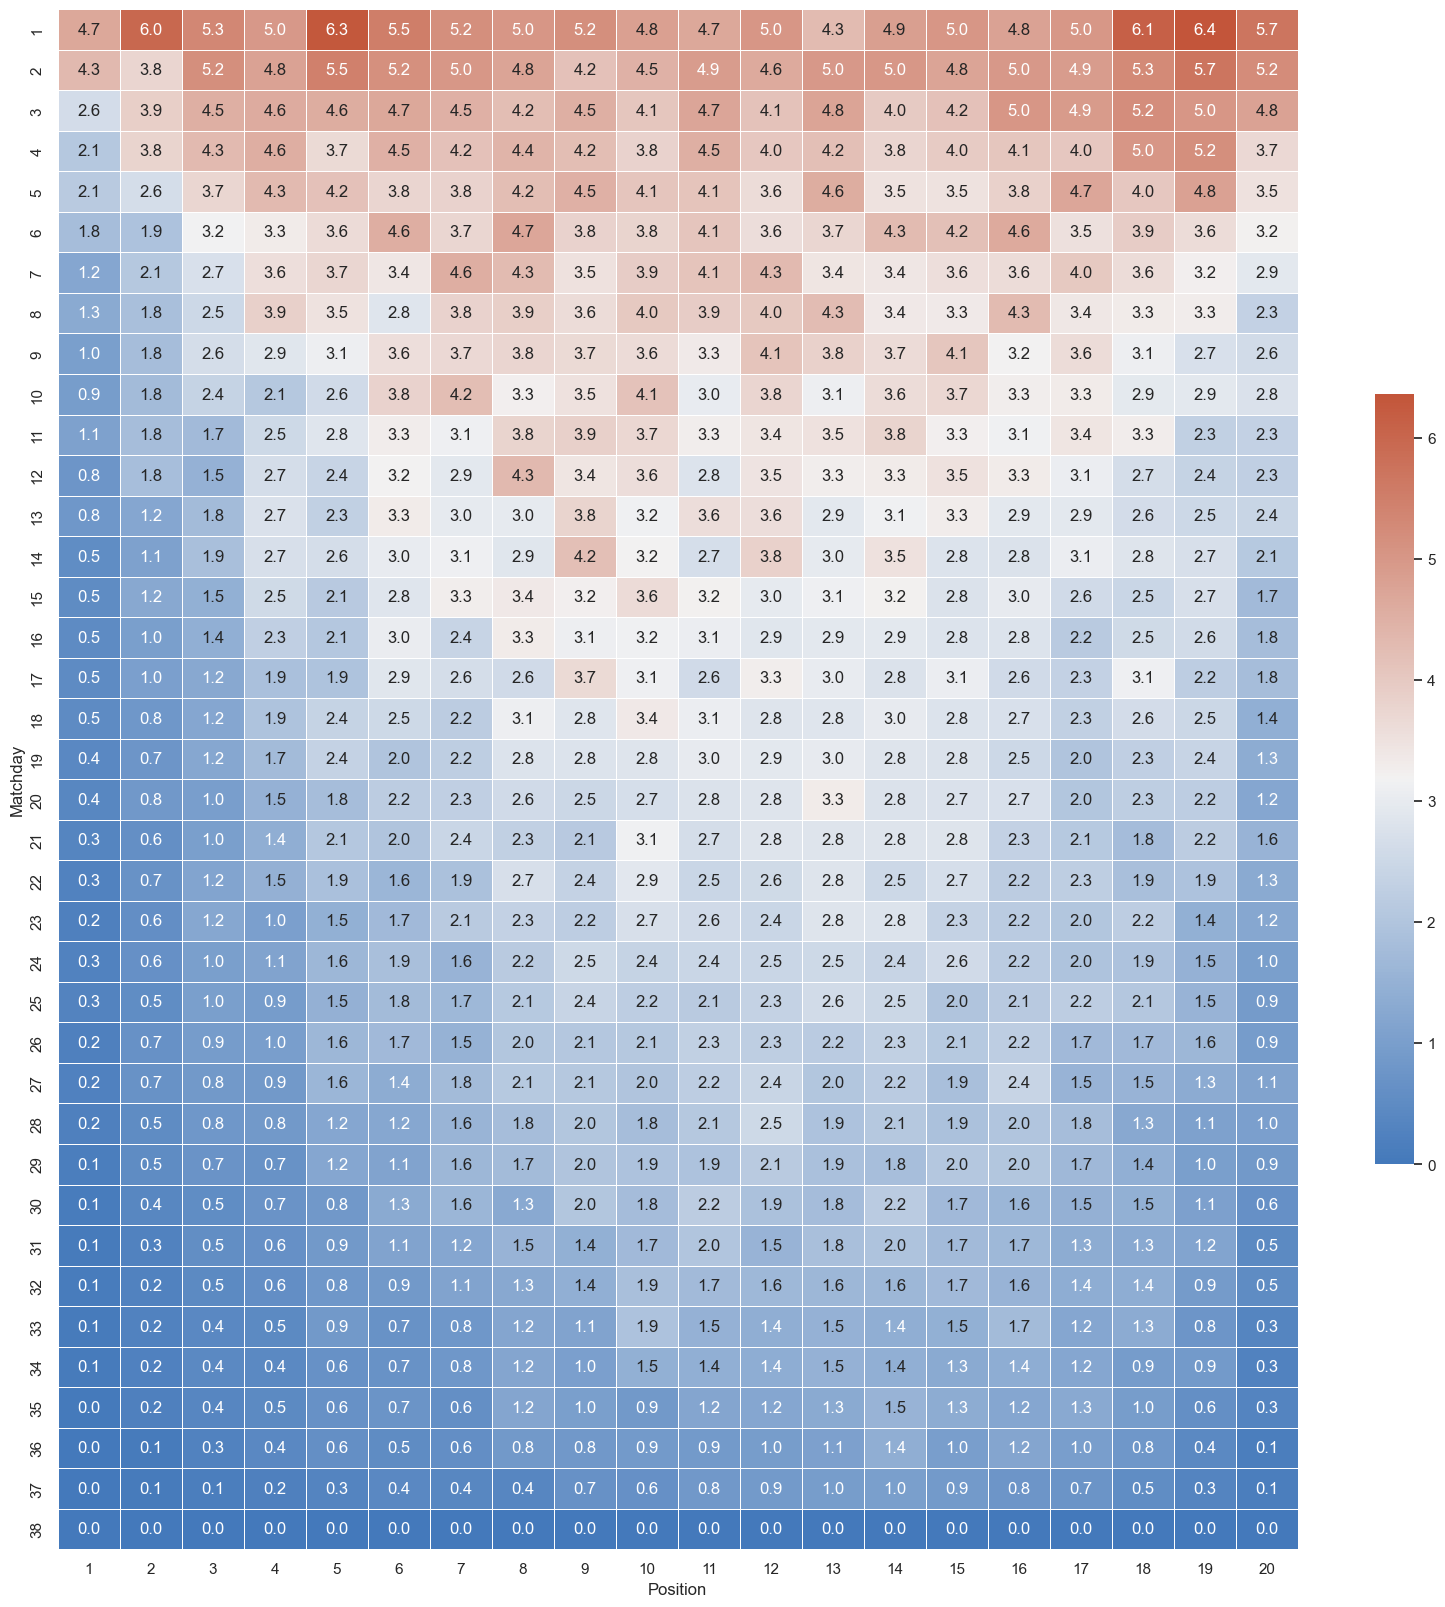

In [19]:
relevant = cldf[['Matchday', 'Position', 'EOS Position']]
pd.options.mode.chained_assignment = None
relevant["Position Difference"] = relevant.apply(lambda row: np.abs(row['EOS Position'] - row['Position']), axis=1)
relevant.drop('EOS Position', axis=1)

grouped = relevant.groupby(['Matchday', 'Position'], as_index=False).mean()
pivoted = grouped.pivot('Matchday', 'Position', 'Position Difference')

pivoted

# Set up figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate diverging color map
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw heatmap with settings
sns.heatmap(pivoted, cmap=cmap, annot=True, fmt='.1f',
            linewidths=.5, cbar_kws={"shrink": .5});

As you can see from the chart, on average teams are within one position of thier final position across the table only by matchday 37, one before the final. Teams are within 2 positions of thier final position by matchday 31. 

Teams are more solidified in their positions at the top and bottom of the table than in the middle, where teams move around more frequently. For example by matchday 14 teams in first only moved 0.5 positions away on average, meanwhile teams in 9th on that same matchday finished on average 4.2 positions away from 9th. 

The challenge of this project will be to see if I can predict end of season position earlier in the season using additional statistics like goal differential and points.

Let's now look at the same correltation matrix as shown above, **but this time with `EOS Position` included**, and at multiple points in the season. This will give us a better idea of how correlated different variables are with the target, `EOS_Position` at different points in the season.

In [20]:
# Add reverse position column for correlation matrix
cldf["Rev Position"] = np.abs(cldf["Position"] - 21)
cldf["Rev EOS Position"] = np.abs(cldf["EOS Position"] - 21)

# Group by matchday
mdgb = cldf.groupby("Matchday")

fs_cols = ['Rev EOS Position', 'Rev Position', 'Points', 'Wins', 'Goal Differential', 'Goals For', 
            'Stadium Capacity', 'Appearances', 'Draws', 'Goals Against', 'Losses', ]

##### After one matchday

After just one matchday, `EOS Position` has a correlation of < 0.4 with all table statistics. Nothing is very predictive. Only `Stadium Capacity` and `Appearances` have higher values, because they give information beyond this specific season.

Note that `Wins`, `Points`, `Goal Differential` and `Losses` are all already highly correlated.

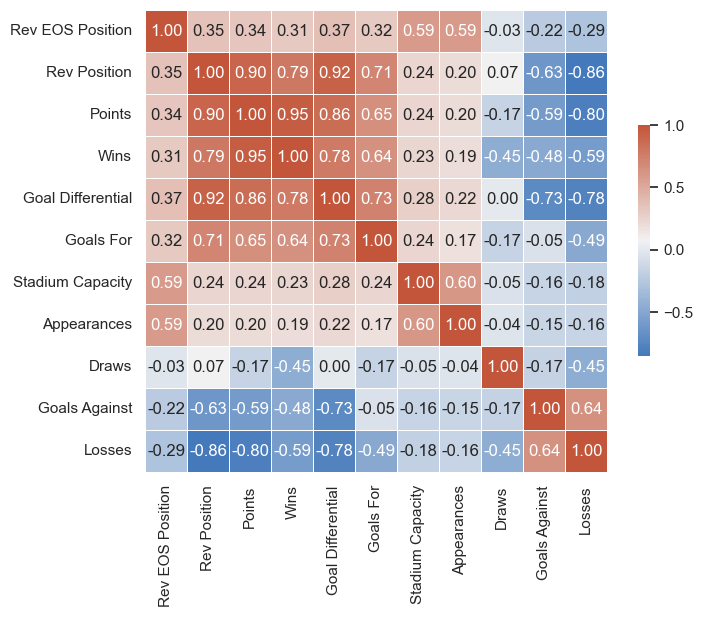

In [21]:
show_corr_matrix(mdgb.get_group(1), fs_cols)

##### After 18 matchdays (halfway through the season)

At this point, pretty all table statistics correlate > 0.8 with EOS position, and `Wins`, `Points`, `Goal Differential` and `Losses` are all correlated at 0.87 or higher with each other.

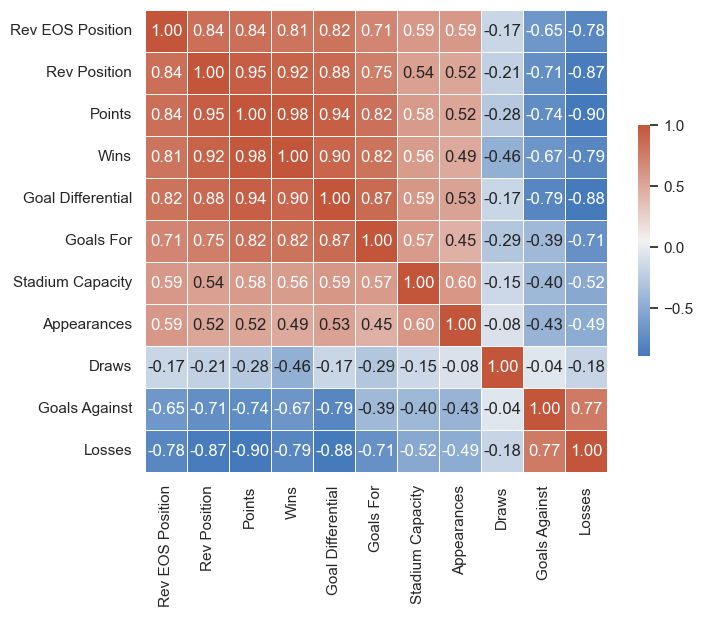

In [22]:
show_corr_matrix(mdgb.get_group(18), fs_cols)

##### After 36 matchdays (almost the end of the season)

At this point, pretty all table statistics correlate > 0.9 with EOS position.
`Wins`, `Points`, `Goal Differential` and `Losses` are all correlated about equally as closely with eachother as at matchday 18.

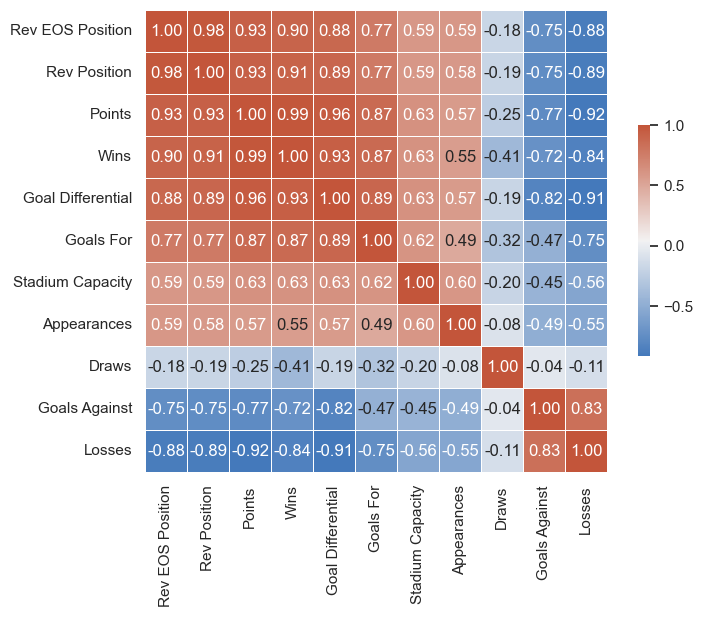

In [23]:
show_corr_matrix(mdgb.get_group(36), fs_cols)

#### Summary of correlation matricies

Clearly the closer it is to the end of the season, the more correlated table statistics are with where a team will finish. Perhaps the interactions of the variables can give better predictive accuracy. For example, a team with low Points but a high goal differential may finish higher than a team with equally as many points but a worse goal differential.

## 5. Models

### 5a. Model Selection: Ordinal Regression Model

Because I am trying to predict an ordinal discrete variable with my regression, after looking at a number of options I decided an ordinal regression model best fit the needs of this project. Ordinal regression is used when the dependant variable has three or more *unambiguously ordered* categories. In the case of my project the dependant variable (`EOS Position`) essentially has 20 ordered categories, 1st through 20th table position.

The idea behind the ordinal regression model is similar to other regression models. There are 1 or more independent variables that are assigned coefficients when the model is fit. The sum of the values of input variables times thier coefficients gives the value of `y` in the equation. The difference is that this `y` value is not itself the predictor.

Since we are trying to predict where some variables would place a piece of data in an ordinal set of categories, the model attempts to establish threshold values between each of those categories. Once those are established, the `y` value determined for a given set of feature values is used to predict in which category that data belongs.

For example, if the threshholds were:

- -1 (Bad/Okay)
- 0 (Okay/Good)

Then there would be three ordinal categories, `Bad` `Okay` and `Good`. A `y` below -1 would be categorized as `Bad`, a `y` between -1 and 0 would be categorized as `Okay` and a `y` above 0 would be categorized as `Good`. I hope that is a decent explanation of how the model works, one more thing to note is that there cannot be an intercept in this model.

There is a version of this model that is part of the `statsmodels` library at `statsmodels.miscmodels.ordinal_model`. It is called `OrderedModel`.

### 5b. Feature Engineering

#### Remaking the dependant variable

Unfortunately, after some experimentation I found that having a 20 category ordinal discrete variable was too much for the model given the size of my dataset. Although I have many rows of data, they all correspond to the same 20 teams * 18 seasons * 4 leagues, so the end result is about 1440 `EOS Position` values that can be predicted, although at 38 different points in the season.

While this is a decent amount of data, for the model to establish 19 categorical thresholds, the dataset would need to be much larger. I was able to fit a model, but I found the success rate to be very low. As a result of this I decided to reshape the problem: I would recreate the `Fate` feature I had removed earlier and try to predict that.

At the end of a season a club will get one of a few outcomes: get a spot in the Champions League, Europa League or Conference League, remain in the league the next year or be relegated to a lower league. I decided the model might do better trying to predict a `Fate` rather than a specific position, so I transformed `EOS Position` to `Fate` with the following categories:

- 1-4: Champions League
- 5-7: Europa/Conference League
- 8-12: Upper Mid-Table
- 13-17: Lower Mid-Table
- 18-20: Relegation

Those categories would make up the new dependant variable.


#### Remaking some of the independant variables

In the same way that the dataset was too small to predict so many categories, it was too small for stadium size to be useful. After examining the histogram of stadium sizes above, I decided to also categorize the `Stadium Capacity` into small, medium and large as follows:

- <17.5k: Small
- 17.5-40k: Average
- 40k+: Large

I moved most of the code that did that outside this document to a file called `helpers.py` so it didn't take up so much space. This file and the rest of the project's code can be found at the GitHub repo:
`https://github.com/derek-watson14/3022-Project-dewa5122`

Finally, I also created a calculated column called `Points Per Week` which divided points total by number of matches played, which I thought might allow the model to compare weeks more easily. 

In [24]:
import helpers as hlp

In [25]:
l = cldf
c = hlp.Categorizer()

l["Fate"] = l.copy().apply(lambda row: c.categorize_fate(row), axis=1).astype(c.fate_cat)
l["Stadium Size"] = l.copy().apply(lambda row: c.categorize_stadium(row), axis=1).astype(c.size_cat)
l["Points Per Week"] = l.copy().apply(lambda row: row["Points"] / row["Matchday"], axis=1)

l = pd.get_dummies(l, columns=['Stadium Size'], drop_first=True)

train = l.copy()[((l['Year'] - 2003) % 9) != 0]
test = l.copy()[((l['Year'] - 2003) % 9) == 0]

### 5c. Initial Model Creation: Forward Stepwise Selection

Also in the `helpers.py` I created a function to perform forward stepwise selection. The models it produced at each step are listed below:

In [26]:
# This will take a very long time to run, it creates and tests 13^2 models
stepwise_models = hlp.forward_stepwise(hlp.all_predictors, train, test);

In [27]:
swm_df = pd.DataFrame(stepwise_models, columns=["Newest Feature", "Correct Predition Rate", "Current Model", "Log-Liklihood"])
swm_df

,Newest Feature,Correct Predition Rate,Current Model,Log-Liklihood
0,Position,0.586515,[Position],-52382.809949
1,Matchday,0.598727,"[Position, Matchday]",-52381.519509
2,Draws,0.597867,"[Position, Matchday, Draws]",-52380.542531
3,Points Per Week,0.596147,"[Position, Matchday, Draws, Points Per Week]",-52362.883940
4,Stadium Size_Average,0.596319,"[Position, Matchday, Draws, Points Per Week, S...",-51556.475812
5,Goal Differential,0.604403,"[Position, Matchday, Draws, Points Per Week, S...",-49226.827719
6,Losses,0.606811,"[Position, Matchday, Draws, Points Per Week, S...",-48995.600728
7,Goals Against,0.603543,"[Position, Matchday, Draws, Points Per Week, S...",-48913.765755
8,Points,0.598211,"[Position, Matchday, Draws, Points Per Week, S...",-48950.361248
9,Goals For,0.597351,"[Position, Matchday, Draws, Points Per Week, S...",-48929.591884


Unfortunately the model's predictive accuracy only improved by <2% from adding the initial `Position` feature as more features were added. This could be due to the fact that the training and test data had a relationship that limited how good the function could be. The log liklihood (which drove the selection part stepwise selection) did better, increasing by about 11%. 

#### Attempt to find a better model

The models created by forward stepwise selection algorithm were generally pretty disappointing in thier predictive abilities, so I thought I would use domain knowledge to try and create one by hand. After many attempts using combinitions of variables that I thought would be useful as a human, I was unable to improve upon the predictive accuracy of the models created by stepwise selection.


#### Addressing Multiple Colinearity in the Stepwise Model

Looking at the models created by each step and looking at the correlation matrix created above, one can observe that the model naturally shys away from features that are highly correlated or almost colinear until it absolutely must due to the number of features being used. It does not bring in any two of `Wins`, `Points`, `Position` and `Goal Differential` until the 6th step, and even then it brings in `Goal Differential` and `Position` which are the least correlated of the features above and represent two slightly different things when thinking about the domain from a human perspective.

## 6. Results and Analysis 

Now let's select the best model produced by the stepwise selection algorithm and look at some of the evaluation metrics in its summary. Ordinal Regression has no R-Squared value because it does not use that methodology to fit the data. What it does have is Log-Liklihood, where a higher Log_Liklihood represents a better fir for the model. Unfortunately unlike R-Squared, the log-liklihood value by itself doesn't have any meaning, it is only useful for comparing models to eachother. 

### 6a. Model evaluation metrics

Below is a graph of the log liklihood for each step of the Forward Stepwise Selection:

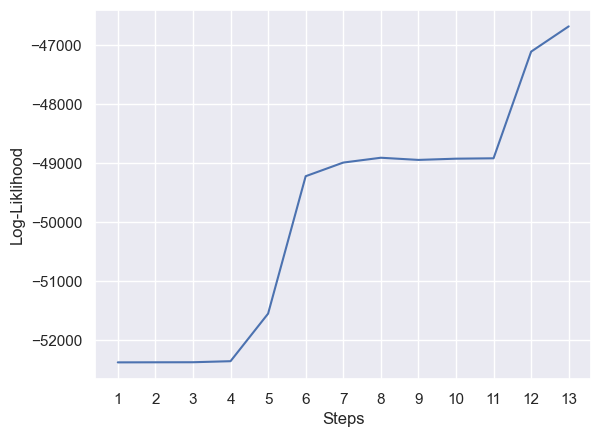

In [28]:
ax = sns.lineplot(data=swm_df, x=np.linspace(1, 13, 13), y="Log-Liklihood")
ax.set(xlabel="Steps")
ax.set_xticks(np.linspace(1, 13, 13))

plt.show()

#### Model improvement with different numbers of selectors

Clearly, as more variables are used the model fits the data better. That is not the only factor in model selection however. We want to avoid colinear independant variables and emphasize simplicity by using as few variables as possible while still getting near optimal metrics. For those reasons I chose the model created in the sixth step, where `Goal Differential` is added to the model. You can see at that point the increase in log liklihood with each step slows until it is using almost every variable.

So the model uses the predictors:

In [29]:
predictors = swm_df.iloc[5]["Current Model"]
predictors

['Position',
 'Matchday',
 'Draws',
 'Points Per Week',
 'Stadium Size_Average',
 'Goal Differential']

That model does not contain any perfectly colinear variables (though `Position`, `Points Per Week` and `Goal Differenial` are highly correlated), contains only 6 of the 13 possible variables and all of the variables included have a p-value below the 0.05 threshold.

Lets take a look at the summary produced by this model when trained on the entire dataset instead of just the test set used in the stepwise seleciton. 

In [30]:
model = OrderedModel(l['Fate'], 
                     l[predictors],
                     distr='logit')

In [31]:
%time result = model.fit(method='powell')

Optimization terminated successfully.
         Current function value: 1.020447
         Iterations: 16
         Function evaluations: 1836
CPU times: total: 8.22 s
Wall time: 9.46 s


Notice that the model trains fairly slowly, taking close to 9 seconds.

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   Fate   Log-Likelihood:                -54831.
Model:                   OrderedModel   AIC:                         1.097e+05
Method:            Maximum Likelihood   BIC:                         1.098e+05
Date:                Mon, 12 Dec 2022                                         
Time:                        21:00:06                                         
No. Observations:               53732                                         
Df Residuals:                   53722                                         
Df Model:                          10                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Position                                     -0.2617      0.005    -57.482      0.000      -0.271      -0.253
Matchday                                      0.0109      0.001      7.614      0.000       0.008       0.014
Draws                                        -0.0130      0.004     -3.062      0.002      -0.021      -0.005
Points Per Week                               0.2683      0.038      7.103      0.000       0.194       0.342
Stadium Size_Average                         -0.6396      0.018    -34.828      0.000      -0.676      -0.604
Goal Differential                             0.0889      0.001     63.849      0.000       0.086       0.092
Relegation/Lower Mid-Table                   -6.1105      0.100    -61.264      0.000      -6.306      -5.915
Lower Mid-Table/Upper Mid-Table               0.8702      0.008    108.989      0.000       0.855       0.886
Upper Mid-Table/Europa/Conference League      0.8382      0.008    106.324      0.000       0.823       0.854
Europa/Conference League/Champions League     0.5714      0.010     56.413      0.000       0.552       0.591
=============================================================================================================
"""

#### Predictive accuracy of model

Notice that the Log-Likelihood here is slighly different than the Log Liklihood in the original, this is becuase we are creating the model with the full dataset. Still, all of the p-values are almost 0 and none of the confidence intervals contain 0, so I think this model is about the best I can make. 

Let's train and test it on new, random datasets and see the results!

In [33]:
train2 = l.sample(n=30000)
test2 = l.sample(n=15000)

model = OrderedModel(train2['Fate'], 
                     train2[predictors],
                     distr='logit')

%time result = model.fit(method='powell')

Optimization terminated successfully.
         Current function value: 1.020062
         Iterations: 16
         Function evaluations: 1836
CPU times: total: 4.92 s
Wall time: 5.47 s


In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   Fate   Log-Likelihood:                -30602.
Model:                   OrderedModel   AIC:                         6.122e+04
Method:            Maximum Likelihood   BIC:                         6.131e+04
Date:                Mon, 12 Dec 2022                                         
Time:                        21:00:11                                         
No. Observations:               30000                                         
Df Residuals:                   29990                                         
Df Model:                          10                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Position                                     -0.2618      0.006    -42.882      0.000      -0.274      -0.250
Matchday                                      0.0105      0.002      5.446      0.000       0.007       0.014
Draws                                        -0.0127      0.006     -2.212      0.027      -0.024      -0.001
Points Per Week                               0.2510      0.050      4.985      0.000       0.152       0.350
Stadium Size_Average                         -0.6345      0.025    -25.796      0.000      -0.683      -0.586
Goal Differential                             0.0899      0.002     47.913      0.000       0.086       0.094
Relegation/Lower Mid-Table                   -6.1406      0.133    -46.036      0.000      -6.402      -5.879
Lower Mid-Table/Upper Mid-Table               0.8726      0.011     81.866      0.000       0.852       0.894
Upper Mid-Table/Europa/Conference League      0.8347      0.011     78.977      0.000       0.814       0.855
Europa/Conference League/Champions League     0.5526      0.014     40.294      0.000       0.526       0.579
=============================================================================================================
"""

In [35]:
predicted = result.model.predict(result.params, exog=test[predictors]);
pred_choice = predicted.argmax(1)
score = (test['Fate'].values.codes == pred_choice).mean()
print('Fraction of correct choice predictions:')
print(score)

Fraction of correct choice predictions:
0.6006191950464397


So here again with a random sample for the test and the training data, the model is about 60% accurate for predicting where a team will end its season.

### 6b. Model performance for original task

One other goal of this project was to see how the model's prediction accuracy improved as the season went from start to finish. Let's look at how the model performs for each week of the season, then chart the progress compared to a *niave prediction* that simply predicts a team will finish in the exact position they are in now. 

Note: the Ordinal Regression model cannot accept an intercept value, and when looking only at data for each week, the `Matchday` value will accidentally act as an intercept, so for this visualization it needs to be removed.

In [36]:
pred = predictors.copy()
pred.remove('Matchday')
pred

['Position',
 'Draws',
 'Points Per Week',
 'Stadium Size_Average',
 'Goal Differential']

In [87]:
prediction_scores = []

mdgb2 = l.groupby("Matchday")

# Train and test with random samples
for m in range(1, 39):
    d = mdgb2.get_group(m)
    d["Niave Prediction"] = d.copy().apply(lambda row: c.categorize_fate_niave(row), axis=1).astype(c.fate_cat)
    tr = d.sample(n=1000)
    te = d.sample(n=800)
    mod = OrderedModel(tr['Fate'], 
                     tr[pred],
                     distr='logit')
    r = mod.fit(method='powell', disp=0)
    p = r.model.predict(r.params, exog=te[pred]);
    pc = p.argmax(1)
    s = (te['Fate'].values.codes == pc).mean()
    np = (te['Fate'].values.codes == te['Niave Prediction'].values.codes).mean()
    prediction_scores.append((m, s, np))

As seen in the dataframe below, the model does better and better as the season progresses, but so do the niave predictions. Early in the season the model is between two and eight percent better than the Niave prediction.

In [88]:
psdf = pd.DataFrame(prediction_scores, columns=["Matchday", "Model Correct %", "Niave Correct %"])
psdf["Difference"] = psdf["Model Correct %"] - psdf["Niave Correct %"]
psdf.head(38)

,Matchday,Model Correct %,Niave Correct %,Difference
0,1,0.35625,0.29000,0.06625
1,2,0.37750,0.30000,0.07750
2,3,0.39125,0.34500,0.04625
3,4,0.41500,0.40375,0.01125
4,5,0.42750,0.41500,0.01250
5,6,0.42500,0.40500,0.02000
6,7,0.44375,0.41500,0.02875
7,8,0.47125,0.44375,0.02750
8,9,0.47500,0.44750,0.02750
9,10,0.46750,0.45875,0.00875


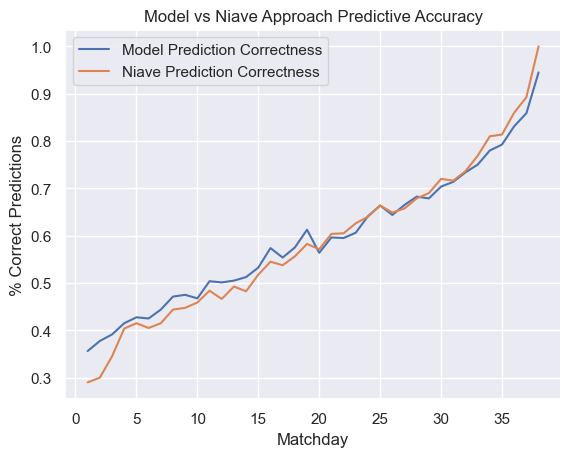

In [89]:
plt.plot(psdf["Matchday"], psdf["Model Correct %"], label="Model Prediction Correctness")
plt.plot(psdf["Matchday"], psdf["Niave Correct %"], label="Niave Prediction Correctness")

plt.title("Model vs Niave Approach Predictive Accuracy")
plt.xlabel("Matchday")
plt.ylabel("% Correct Predictions")

plt.legend()
plt.show()

As can be seen in the above plot, the model does noticably but not significantly better than the niave approach for the first 18 or so matchdays of the season, after which point the two are indistinguishable.

The early season is certainly harder to predict than the late season, so the model doing better there is an encouraging sign. But the fact that it is such a modest improvement over the niave approach leaves me wanting more.

## 7. Conclusion

Overall, the model was not as much of an improvement from a niave approach of predicting how teams will end the season as I would have hoped. Compared to a method that simply predicted that a team would end the season in exactly the position they were in, the model guessed **slightly better** than the niave approach for the first 18 or so weeks of the season, then did **about equally or worse** as at the end of the season with about 600 rows of data making up each prediction percentage. Of course this changes each time as a different sample is used, but after running many times the same pattern emerged. 

I think a human with good domain knowledge could probably do better than this, given that they would also have far more information to work off than the model does and be able to interpret it in a more nuanced manner. But even if a human could do better they could never be perfect, which speaks to unpredictability being part of the beauty of sport.

I'd like to finish this project by considering why the model maybe didn't work as well as expected and suggestions on how that could be improved if I were to do it again.


#### Why didn't it really work

There are a number of issues that could have been the culprit here. Perhaps the type of regression I chose, Ordinal Regression, was suboptimal for the task. I didn't have time to consider every possible model, so perhaps there is a better option. I even originally considered doing linear regression and just rounding the output to get a prediction but that seemed like a bad use case.

Other than that, perhaps my dataset was too small, looking at only 20 teams * 4 leagues * 18 seasons seems like a lot when each of those has 38 weeks each making up a row, but in reality I only had a sample of 1,440 response variables to work with. 

Lastly I think there is just too much variation in sports. Teams can buy players mid-season and suddenly get much better, teams can also have injuries mid season and suddenly get much worse. There is also a lot of chance and unpredictable outcomes that mean the unexplained error for any model is probably going to be really high.

The final major issue was the high correlation between many of my independent variables. This meant that though I had a large number of predictors to work with, since they were all correlated they all told basically the same thing. This is something I would be much mroe aware of were I to do this again. 


#### Ways to improve

I think the main thing I wish I had had while working on this was a larger variety of independent variables to act as predictors. Some other data I wish I had were: average team age, average market value of players, club total championships, injury statistics. I could go on. This would maybe result in an overfitting problem, but if I had had more uncorrelated data to work with it is possible I could have found a combination that made a better model. Unfortunately I didn't have time to add more data to the dataset by the time I made this realization late in the project.

#### Note: If there are issues viewing this notebook, I made a PDF that is available in the project repo here:
#### https://github.com/derek-watson14/3022-Project-dewa5122